In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from matplotlib import pyplot as plt
from prettytable import PrettyTable

In [2]:
df = pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
# print(list(df))

In [4]:
output = df['alcohol']

In [5]:
inp = df.drop('alcohol', axis=1)

In [6]:
X = inp.values #converting dataframe to numpy array
y = output.values

In [17]:
def residual_sum_of_squares(estimator, X, y):
    print("Predicted values:\n{0}\n*****************************************\n".format(estimator.predict(X)))
    ans = sum((estimator.predict([X[i]])- y[i])**2 for i in range(len(y)))
    return ans

In [18]:
model = LinearRegression()
scores = cross_val_score(model, X, y,scoring=residual_sum_of_squares, cv = 5)


Predicted values:
[ 9.71539297  9.57706657  9.63159118 10.58380207  9.71539297  9.65262143
  9.76242927 11.19931788 10.41360768 10.5451028   9.46462476 10.5451028
 10.8154011  10.21728646  9.12152662  9.25124634 10.5767317   9.500364
  9.82042817  9.22486158 10.70748259  9.75673057  9.614558    9.5994418
 10.01821345  9.65324609  9.94028612  9.614558    9.72398717 10.50763394
  9.96098075 10.23164062  9.76666922 10.63784331  9.20394863 10.21139214
 10.25634317 10.31320953 10.75703556 10.3626676  10.3626676   9.64537967
  9.70570169 10.69611217 10.22443482 12.07765344  9.86072596  9.94889329
  9.70651681  9.378861    9.8211365  10.49909541 10.5079781   9.79908061
 10.17207985  9.56037354 10.54148499  9.25966178  9.93393633 10.60773751
 10.24750772  9.63123269 10.38300297  9.80632555 10.77687852 10.77687852
  9.88790402  9.99717501 10.63551625 10.96355301  9.99700137 10.09703071
 10.06795329  9.47875495 10.08708042 10.53412557 10.53412557 10.47441019
 10.06788576  9.34149751  9.87934886 

In [19]:
# All scorer objects follow the convention that higher return values are better than lower return values. 
# Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.
# print(scores)
print("Average RSS: %f" %(sum(scores)/len(scores)))

Average RSS: 128.714415


# Question 2

In [30]:
inp = []
out = []
for alpha in np.arange(0, 1, 0.0001):
    model = Ridge(alpha= alpha)
    inp.append(alpha)
    out.append(np.average(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv = 5))*-1)
        

In [31]:
%matplotlib notebook

<IPython.core.display.Javascript object>


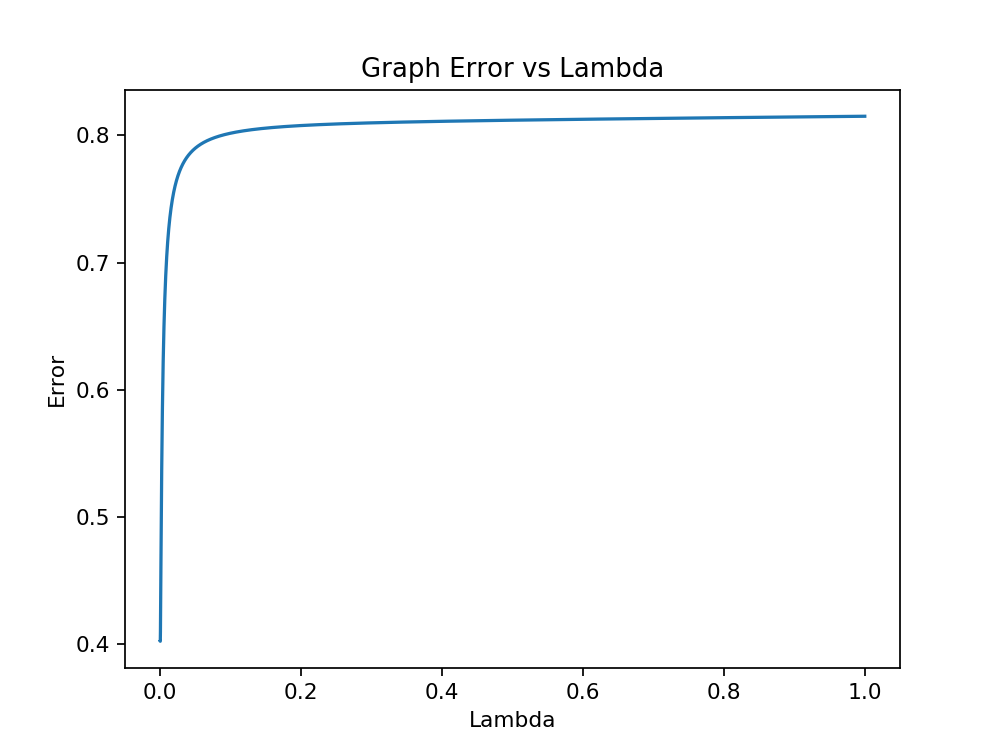

In [32]:
plt.plot(inp, out)
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.title("Graph Error vs Lambda")
plt.show()

In [33]:
temp = dict(zip(inp, out))

In [34]:
temp = sorted(temp.items(), key = lambda x: x[1])
print("Value of lambda with least error: %f\nError value: %f" %(temp[0][0], temp[0][1]))

Value of lambda with least error: 0.000100
Error value: 0.402347


## Since the error is min for lambda = 0.001, we use this to report the residual error

In [46]:
model = Ridge(alpha = temp[0][1])
best_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

In [47]:
table = PrettyTable(['fold number', 'mean squared error'])

In [48]:
for i, val in enumerate(best_scores):
    table.add_row([i+1, val*-1])
print(table)

+-------------+--------------------+
| fold number | mean squared error |
+-------------+--------------------+
|      1      | 0.7858459796909978 |
|      2      | 0.8709725065053622 |
|      3      | 0.6744291887499511 |
|      4      | 1.0477968331955168 |
|      5      | 0.6765498077097857 |
+-------------+--------------------+
